# Introduction to Network Analysis with NetworkX

This notebook offers a first introduction to building networks (also referred to as **graphs**) using the `networkx` package in Python. In what follows, we'll focus on the logic of how one can construct graphs. We'll then take a look a look into some ways of displaying graphs, and into ways of deriving basic statistics of graphs to identify properties of elements within the graph.

We begin our foray into network analysis by constructing a very simple graph using `networkx`. As always, we should install the package before using it:

In [ ]:
!pip install networkx

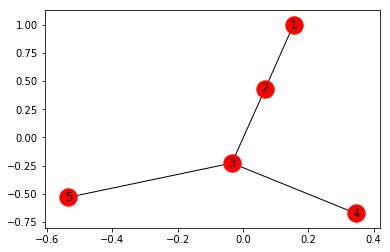

In [2]:
import networkx

# initialize an empty graph
G = networkx.Graph()

# add some "edges" to the graph -- edges connect nodes
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(3, 5)

# draw the network
networkx.draw_networkx(G)

As we can see above, creating a basic graph with networkx is fairly straightforward. We initialize an empty graph, then add **edges** (or connections between **nodes**, the individual elements in a graph) to specify the graph structure. 

Examining the displayed graph gives us one way to see the nodes and edges that comprise our graph. But we could also display the graph nodes and edges by accessing the `nodes` and `edges` attributes on `G`, our graph:

In [3]:
G.nodes

NodeView((1, 2, 3, 4, 5))

In [4]:
G.edges

EdgeView([(1, 2), (2, 3), (3, 4), (3, 5)])

<h2 style='color:green'>Reviewing Basic Graph Construction</h2>

See if you can use the syntax discussed above to create a graph with edges between the following structure:
  
<img src='./images/sample-graph.png' style='height:200px' />

<details>
  <summary>Solution</summary>
  We can build this graph with the following code:
    
  ```
  import networkx

  # initialize an empty graph
  G = networkx.Graph()

  # add some "edges" to the graph -- edges connect nodes
  G.add_edge('A', 'C')
  G.add_edge('B', 'C')
  G.add_edge('C', 'D')

  # optionally draw the network
  networkx.draw_networkx(G)
  ```
</details>

# Creating Graphs from Edge Lists

In the example above, we added edges to our graph one by one in a rather manual fashion. Usually, however, we have some kind of data structure that contains all of our graph information, and we use that data structure to populate our graph. 

Let's practice this approach to graph construction in the following snippet. Specifically, let's suppose we have a list of lists, which is sometimes referred to as a **2D Array**:

In [5]:
l = [
  ['Alice', 'Catepillar'],
  ['Alice', 'Mad Hatter'],
  ['Alice', 'Cheshire Cat'],
  ['Cheshire Cat', 'Dodo'],
  ['Knave of Hearts', 'Queen of Hearts'],
]

We can see that `l` is a list of lists (or if you prefer, an array of arrays). Let's suppose each inner list represents two nodes that should be joined by an edge in our graph. We can iterate over these inner lists as follows:

In [6]:
for i in l:
  a, b = i
  print(a, '--', b)

Alice -- Catepillar
Alice -- Mad Hatter
Alice -- Cheshire Cat
Cheshire Cat -- Dodo
Knave of Hearts -- Queen of Hearts


However, that can be rewritten a little more concisely with the following syntax:

In [7]:
for a, b in l:
  print(a, '--', b)

Alice -- Catepillar
Alice -- Mad Hatter
Alice -- Cheshire Cat
Cheshire Cat -- Dodo
Knave of Hearts -- Queen of Hearts


In each iteration of the loop above, we can see that `a` and `b` represent the first and second elements inside the child lists respectively. We can therefore use `a` and `b` to add edges to our graph, just as we did above:

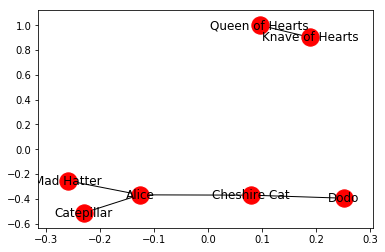

In [8]:
G = networkx.Graph()

l = [
  ['Alice', 'Catepillar'],
  ['Alice', 'Mad Hatter'],
  ['Alice', 'Cheshire Cat'],
  ['Cheshire Cat', 'Dodo'],
  ['Knave of Hearts', 'Queen of Hearts'],
]

for a, b in l:
  G.add_edge(a, b)
  
networkx.draw_networkx(G)

<h2 style='color:green'>Reviewing Graph Construction with Lists</h2>

Suppose we have the following list of lists:
  
```
l = [
  ['A', 'B', 'C'],
  ['C', 'D', 'E'],
  ['C', 'D', 'F'],
]
```

Suppose we are meant to draw edges between the three elements in each inner list. See if you can achieve this goal below:

In [ ]:
# type your code here

<details>
  <summary>Solution</summary>
  We can build this graph with the following code:
    
  ```
  import networkx

  # initialize an empty graph
  G = networkx.Graph()

  l = [
    ['A', 'B', 'C'],
    ['C', 'D', 'E'],
    ['C', 'D', 'F'],
  ]
  
  for a, b, c in l:
    G.add_edge(a, b)
    G.add_edge(b, c)
    G.add_edge(a, c)

  # optionally draw the network
  networkx.draw_networkx(G)
  ```
</details>

# Creating Graphs from a List of Items

In our previous example we constructed graphs from multi-dimensional lists of nodes. Often when working with text data, however, our nodes (e.g. characters or locations extracted from literary works) appear in a flat sequence: 

In [9]:
l = [1,2,3,4,5]

We can convert this flat list into a list of lists just like we used above with the nltk package, a popular package for text analysis:

In [ ]:
!pip install nltk

In [10]:
from nltk import ngrams

l = ['C', 'D', 'E', 'F', 'G']

for a, b in ngrams(l, 2):
  print(a, '--', b)

C -- D
D -- E
E -- F
F -- G


As we can see above, the `ngrams()` function takes two arguments: a list (`l` above) and the number of elements that should be present in each item returned (2 above). The function then passes a sliding window of the given length over the list and returns each sequence of items of the given size. 

We can use this logic to construct edges between adjacent characters in a literary text. Let's suppose we have the following sequence of characters in a novel:

In [11]:
speakers = ['Alice', 'Cheshire Cat', 'Alice', 'Catepillar', 'Alice', 'Mad Hatter']

Using the `ngrams` method, we can look at characters in positions 1 and 2, then characters in positions 2 and 3, and so forth, establishing an edge between each of these pairs of characters. Let's see this in action:

/Users/doug/anaconda/envs/3.5/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


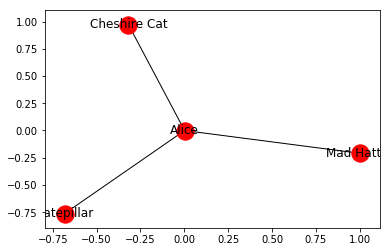

In [12]:
from nltk import ngrams

G = networkx.Graph()

speakers = ['Alice', 'Cheshire Cat', 'Alice', 'Catepillar', 'Alice', 'Mad Hatter']

for a, b in ngrams(speakers, 2):
  G.add_edge(a, b)
  
networkx.draw_networkx(G)

<h2 style='color:green'>Reviewing the Ngram Method #1</h2>

Given our discussion of the `ngrams` function above, how many items would you expect to see in each item returned by the `ngrams` function below:
  
```
l = [2,3,5,7,11,13]

ngrams(l, 3)
```

<details>
  <summary>Solution</summary>
  
  In the example above, we can expect `ngrams(l, 3)` to return sequences with three items each, as 3 is the second argument we specified to the `ngrams` function, and that second argument determines how many items should be in each returned iterable.
</details>

<h2 style='color:green'>Reviewing the Ngram Method #2</h2>

Given our discussion of the `ngrams` function above, what do you expect to be inside the last item returned by the `ngrams` function in the following snippet:
  
```
l = [2,3,5,7,11,13]

ngrams(l, 3)
```

<details>
  <summary>Solution</summary>
  
  We know that the `ngrams` function passes a sliding window over the input list and returns items with n items each, where n is the second argument we provide to the `ngrams` function. Given this logic, we expect the last item returned by the `ngrams` function above to be `(7,11, 13)`.
</details>

# Creating Graphs from XML Data

So far we have focused on some ways to create graphs from lists of lists. Let's now take a look at a way we can construct graphs from raw XML or HTML files. For this example, we will use the [Folger Shakespeare XML data](https://shakespeare.folger.edu/download/), a superb XML edition of each of the Bard's plays. This XML contains clean markup indicating which character speaks which lines in the play. We will use this markup to create edges between characters that speak after one another in a scene, as a sort of "conversation" network.

In what follows, we will create a 2D array `speaker_lists`. Each item in `speaker_lists` will be a list of characters who speak in a scene within the great historical play <i>Henry V</i>. 

In [13]:
import bs4
import os

# specify the file to read
file_path = os.path.join('xml', 'H5.xml')

# create a BeautifulSoup object we can use to parse the file
soup = bs4.BeautifulSoup(open(file_path), 'html.parser')

# create an empty list of speakers in this work
speaker_lists = []

# iterate over each "scene" in the XML
for scene in soup.find_all('div2'):

  # create an empty list of speakers in this scene
  speaker_list = []

  # iterate over each speech in the scene
  for line in scene.find_all('speaker'):

    # add the speaker to the scene speakers
    speaker_list.append( line.find('w').get_text()  )
  
  # add this scene's speakers to the play's speakers
  speaker_lists.append(speaker_list)

If we now print `speaker_lists`, we will see that it is in fact a two dimensional array where each sublist contains all the characters who speak in a scene:

In [14]:
speaker_lists

[['BISHOP',
  'BISHOP',
  'BISHOP',
  'BISHOP',
  'BISHOP',
  'BISHOP',
  'BISHOP',
  'BISHOP',
  'BISHOP',
  'BISHOP',
  'BISHOP',
  'BISHOP',
  'BISHOP',
  'BISHOP',
  'BISHOP',
  'BISHOP',
  'BISHOP',
  'BISHOP',
  'BISHOP',
  'BISHOP',
  'BISHOP',
  'BISHOP'],
 ['KING',
  'EXETER',
  'KING',
  'WESTMORELAND',
  'KING',
  'BISHOP',
  'KING',
  'BISHOP',
  'KING',
  'BISHOP',
  'BISHOP',
  'EXETER',
  'WESTMORELAND',
  'BISHOP',
  'KING',
  'BISHOP',
  'KING',
  'BISHOP',
  'BISHOP',
  'EXETER',
  'BISHOP',
  'KING',
  'AMBASSADOR',
  'KING',
  'AMBASSADOR',
  'KING',
  'EXETER',
  'KING',
  'EXETER',
  'KING'],
 ['CHORUS'],
 ['BARDOLPH',
  'NYM',
  'BARDOLPH',
  'NYM',
  'BARDOLPH',
  'NYM',
  'BARDOLPH',
  'NYM',
  'BARDOLPH',
  'PISTOL',
  'HOSTESS',
  'BARDOLPH',
  'NYM',
  'PISTOL',
  'HOSTESS',
  'NYM',
  'PISTOL',
  'NYM',
  'PISTOL',
  'BARDOLPH',
  'PISTOL',
  'NYM',
  'PISTOL',
  'BOY',
  'BARDOLPH',
  'HOSTESS',
  'BARDOLPH',
  'PISTOL',
  'NYM',
  'PISTOL',
  'NYM',
  'PI

Let's now take that 2D array `speaker_lists` and construct and then plot our graph, using the same techniques we used above:

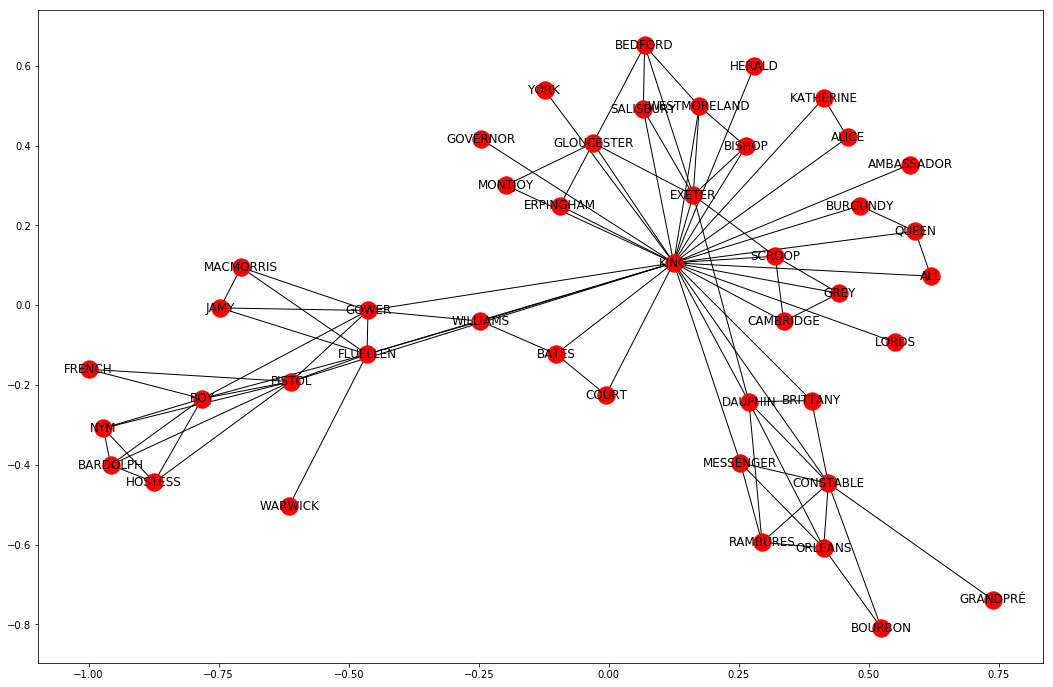

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx

# create an empty graph object
G = networkx.Graph() 
  
# iterate over the scenes in the play
for speaker_list in speaker_lists:
  
  # iterate over each pair of consecutive speakers in the scene
  for a, b in ngrams(speaker_list, 2):
    
    # add an edge between these two speakers to the graph
    G.add_edge(a, b)
  
# set the size of the plot in width, height
plt.figure(figsize=(18, 12)) 

# draw the plot
networkx.draw_networkx(G, with_labels=True)

# Styling Graphs

Often times the first thing one wants to do when working with a graph is to change some of the rendered graph properties. In what follows, we'll look at simple methods we can use to change the color, size, and positions of nodes wihin the graph.

To get started with graph styling, we should note that iterating over `G` (a `networkx.Graph` object), iterates over the nodes in `G`:

In [16]:
for node in G:
  print(node)

MESSENGER
GREY
FLUELLEN
ALL
MONTJOY
WILLIAMS
LORDS
PISTOL
WARWICK
ORLÉANS
BARDOLPH
GLOUCESTER
ALICE
CONSTABLE
WESTMORELAND
YORK
BISHOP
FRENCH
GOWER
JAMY
SALISBURY
BURGUNDY
BEDFORD
BRITTANY
HOSTESS
ERPINGHAM
QUEEN
HERALD
KING
NYM
MACMORRIS
EXETER
RAMBURES
AMBASSADOR
COURT
BOURBON
GOVERNOR
BATES
BOY
SCROOP
GRANDPRÉ
KATHERINE
CAMBRIDGE
DAUPHIN


We can use this method to iterate over each node in the graph, and specify the color of each:

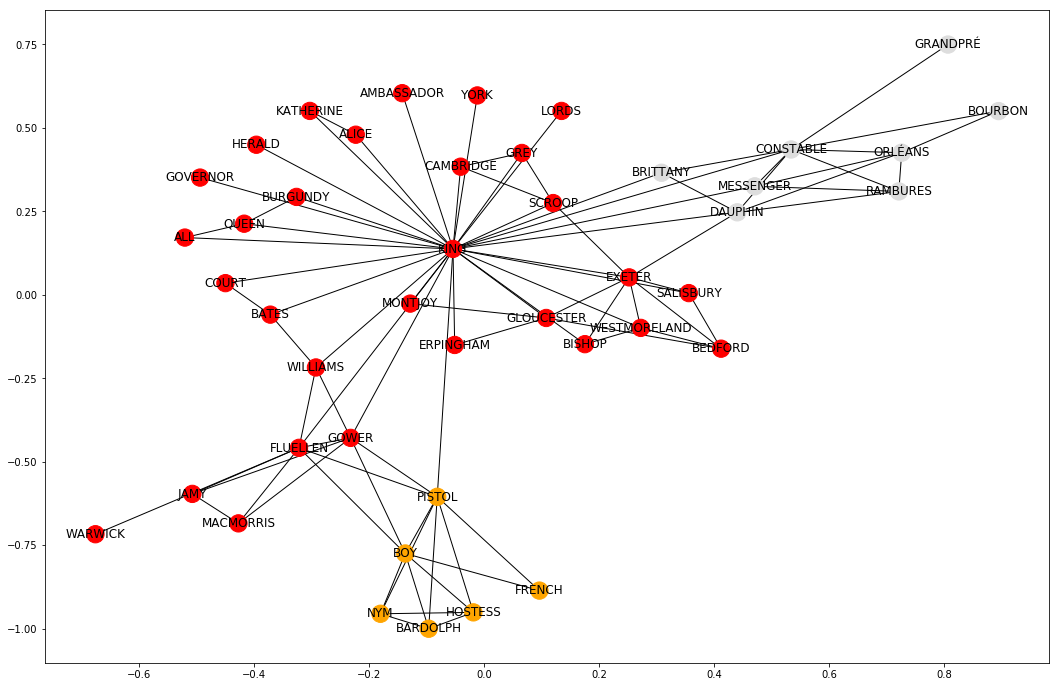

In [17]:
# create an empty list that will store the colors for each node in G
colors = []

# iterate over each node in G
for node in G:
  
  # if the node is in the tavern group, specify orange as the node color
  if node in ['PISTOL', 'HOSTESS', 'BOY', 'BARDOLPH', 'NYM', 'FRENCH']:
    colors.append('orange')
    
  # oterwise if the node is in the French court, specify gray as the color (n.b. we're using CSS color notation!)
  # for more information on CSS colors, see: https://developer.mozilla.org/en-US/docs/Web/CSS/color_value
  elif node in ['DAUPHIN', 'MESSENGER', 'BRITTANY', 'CONSTABLE', 'ORLÉANS', 'RAMBURES', 'BOURBON', 'GRANDPRÉ']:
    colors.append('#dddddd')
  
  # otherwise specify red as the node color
  else:
    colors.append('red')

# set the size of the plot
plt.figure(figsize=(18, 12))

# render the graph
networkx.draw_networkx(G, node_color=colors, with_labels=True)

By the same logic, we can iterate over each node in `G` and specify the size of each:

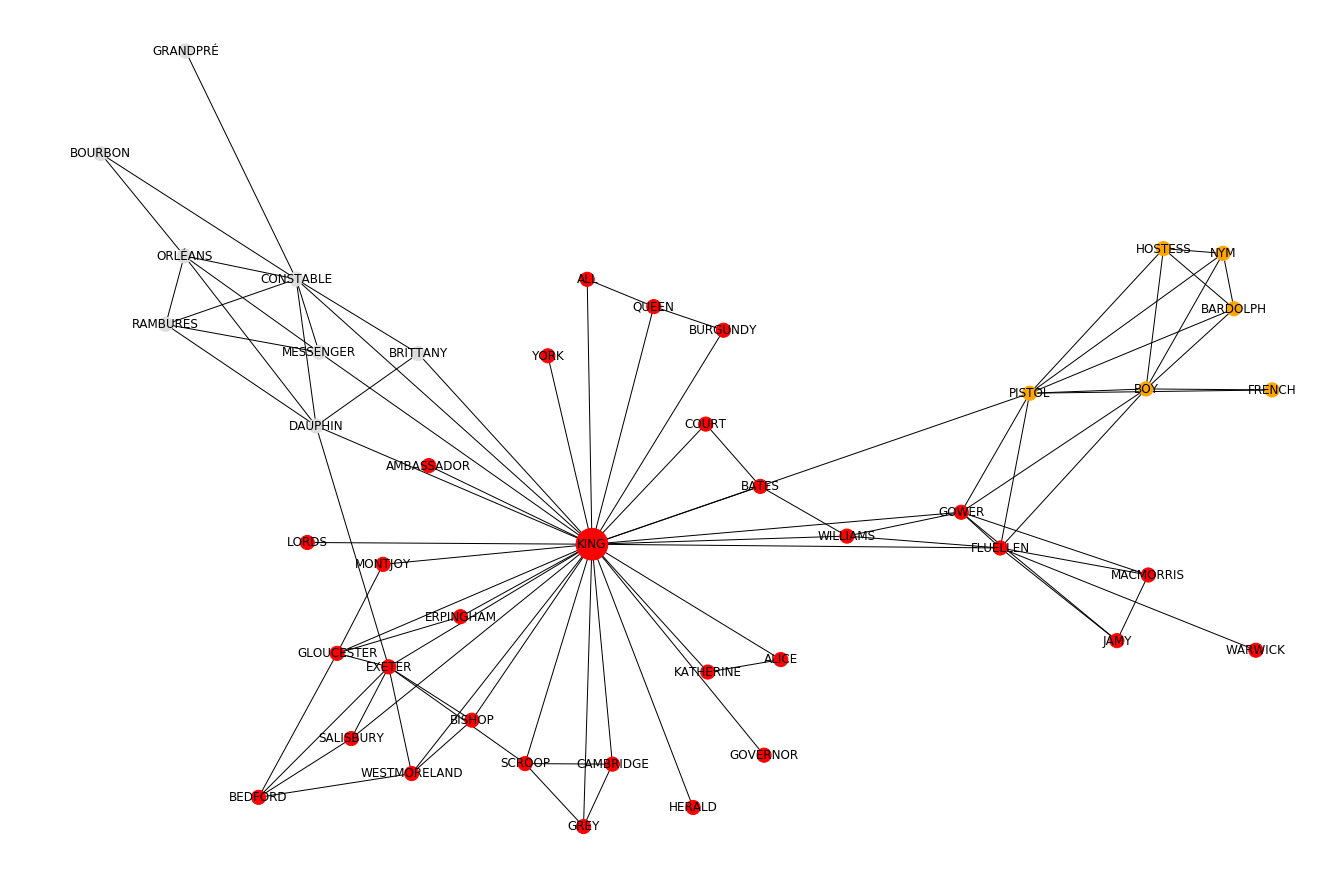

In [18]:
# create an empty list of node sizes
node_sizes = []

# iterate over each node
for node in G:
  
  # size up the king's node size
  if node in ['KING']:
    node_sizes.append(1000)
    
  # make all other nodes smaller
  else:
    node_sizes.append(200)

# set the size of the plot
plt.figure(figsize=(18, 12))

# render the graph
networkx.draw(G, with_labels=True, node_color=colors, node_size=node_sizes)

Finally, we can also change the graph layout to any of the following layout options:
  
```
layouts = ['dot', 'neato', 'twopi', 'circo', 'fdp']
```

Each of these options will create a graph layout using a distinct algorithm. A preview of the layout logic for each of these layouts (except fdp) can be seen below:

<img src='./images/graphviz-layouts.png' style='height:400px'>

Let's experiment with some of these graph layouts below. Note that you may wish to change the width and height of the rendered plot for some layouts:

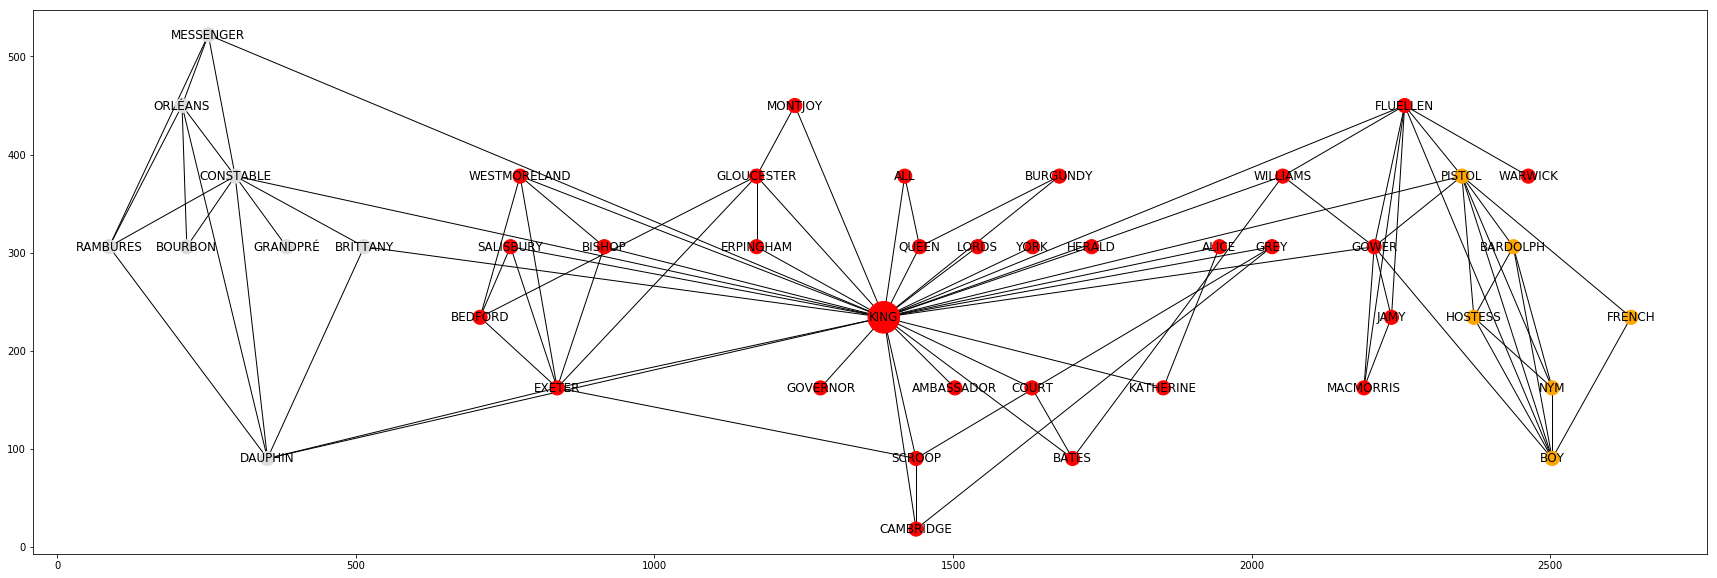

In [19]:
# change the graph layout
layouts = ['dot', 'neato', 'twopi', 'circo', 'fdp']
positions = networkx.drawing.nx_agraph.graphviz_layout(G, prog='dot')

plt.figure(figsize=(30, 10)) 
networkx.draw_networkx(G, positions, node_color=colors, node_size=node_sizes, with_labels=True)

<h2 style='color: green'>Reviewing Graph Styling</h2>

Let's practice some of the graph styling methods discussed above with the following toy graph. See if you can achieve the following styles:

* Color Luigi green
* Make Mario larger than all other nodes
* Change the graph layout to dot

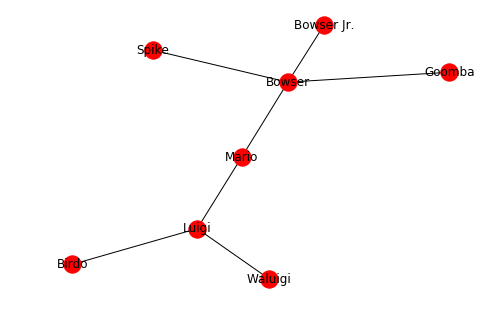

In [20]:
import networkx

# initialize an empty graph
G = networkx.Graph()

G.add_edge('Mario', 'Luigi')
G.add_edge('Luigi', 'Waluigi')
G.add_edge('Luigi', 'Birdo')
G.add_edge('Mario', 'Bowser')
G.add_edge('Bowser', 'Bowser Jr.')
G.add_edge('Bowser', 'Goomba')
G.add_edge('Bowser', 'Spike')

networkx.draw(G, with_labels=True)

In [ ]:
# type your code here

<details>
  <summary>Solution</summary>
  We can achieve these changes with the following lines of code:
  
  ```
  # create the colors list
  colors = ['green' if i == 'Luigi' else 'red' for i in G]

  # create the sizes list
  sizes = [600 if i == 'Mario' else 100 for i in G]

  # use the dot layout
  positions = networkx.drawing.nx_agraph.graphviz_layout(G, prog='dot')

  # render the graph
  networkx.draw(G, positions, node_color=colors, node_size=sizes, with_labels=True)
  ```
  
  Note that this code uses the [**list comprehension**](https://www.programiz.com/python-programming/list-comprehension) technique of creating lists in Python, which is much more succinct than manually creating an empty list and then appending items to that list!
</details>

# Creating Graphs with Named Entity Recognition

A keen observer will notice that when we practiced creating graphs with XML data above, we relied entirely on the fact that the data we wished to process had character names clearly demarcated in structured XML tags. 

Rarely does one encouter data with this structure. Much more often, one encouters simple "flat" texts without any special markup. In these cases, we can create markup of a sort with **Named Entity Recognition** (NER), which is a statistical method of identifying the "named entities" such as people, places, and organizations within a text. To see NER in action, let's install the `spacy` library and [download a model](https://spacy.io/models) for English language documents:

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

Now that `spacy` is installed, let's extract some entities from a sample string below:

In [21]:
import spacy

# load the model we will use to identity named entities
nlp = spacy.load('en_core_web_sm')

# use the nlp() function to extract entities from the input string
doc = nlp('Tim Cook, CEO of Apple, is looking at buying U.K. startup for $1 billion')

# loop over the entities in `doc`
for i in doc.ents:
  
  # get the word and NER label for the current entity
  word = i.text
  label = i.label_
  
  # print the word and its entity type
  print(word, '--', label)

Tim Cook -- PERSON
Apple -- ORG
U.K. -- GPE
$1 billion -- MONEY


In the example above, we can see the model identified four entities in our sample string: one person, one organization, one country, and one monetary denomination. Note that the types of entities above are only a subset of the types of entities spacy can identify. The fuller list includes the following entitiy types:

```
PERSON:      People, including fictional.
NORP:        Nationalities or religious or political groups.
FAC:         Buildings, airports, highways, bridges, etc.
ORG:         Companies, agencies, institutions, etc.
GPE:         Countries, cities, states.
LOC:         Non-GPE locations, mountain ranges, bodies of water.
PRODUCT:     Objects, vehicles, foods, etc. (Not services.)
EVENT:       Named hurricanes, battles, wars, sports events, etc.
WORK_OF_ART: Titles of books, songs, etc.
LAW:         Named documents made into laws.
LANGUAGE:    Any named language.
DATE:        Absolute or relative dates or periods.
TIME:        Times smaller than a day.
PERCENT:     Percentage, including ”%“.
MONEY:       Monetary values, including unit.
QUANTITY:    Measurements, as of weight or distance.
ORDINAL:     “first”, “second”, etc.
CARDINAL:    Numerals that do not fall under another type.
```

Let's now use our nlp model to identify the people in Alice in Wonderland:

In [22]:
import requests
import bs4

# initialize an empty list of characters we will populate below
characters = []

# fetch the HTML for Alice in Wonderland
html = requests.get('https://www.gutenberg.org/files/11/11-h/11-h.htm').text

# create a BeautifulSoup object so we can parse the html
soup = bs4.BeautifulSoup(html, 'html.parser')

# iterate over the paragraphs in the html
for paragraph in soup.find_all('p'):
  
  # create an empty list of characters in this paragraph
  paragraph_characters = []
  
  # iterate over each discovered entity in this paragraph
  for entity in nlp(paragraph.get_text()).ents:
    
    # only proceed if the current entity is of type "PERSON"
    if entity.label_ == 'PERSON':
      
      # clean the character name
      character = entity.text.strip()
      
      # if the character is non-empty, add it to our list of identified characters
      if character: paragraph_characters.append(character)
  
  # add this paragraph's characters to the list of characters
  characters.append(paragraph_characters)

We now have a list of lists named `characters` that is just like the list of lists we used above to add edges to a graph. Let's replicate the proceedure we used above to add edges to our graph in the same way below:

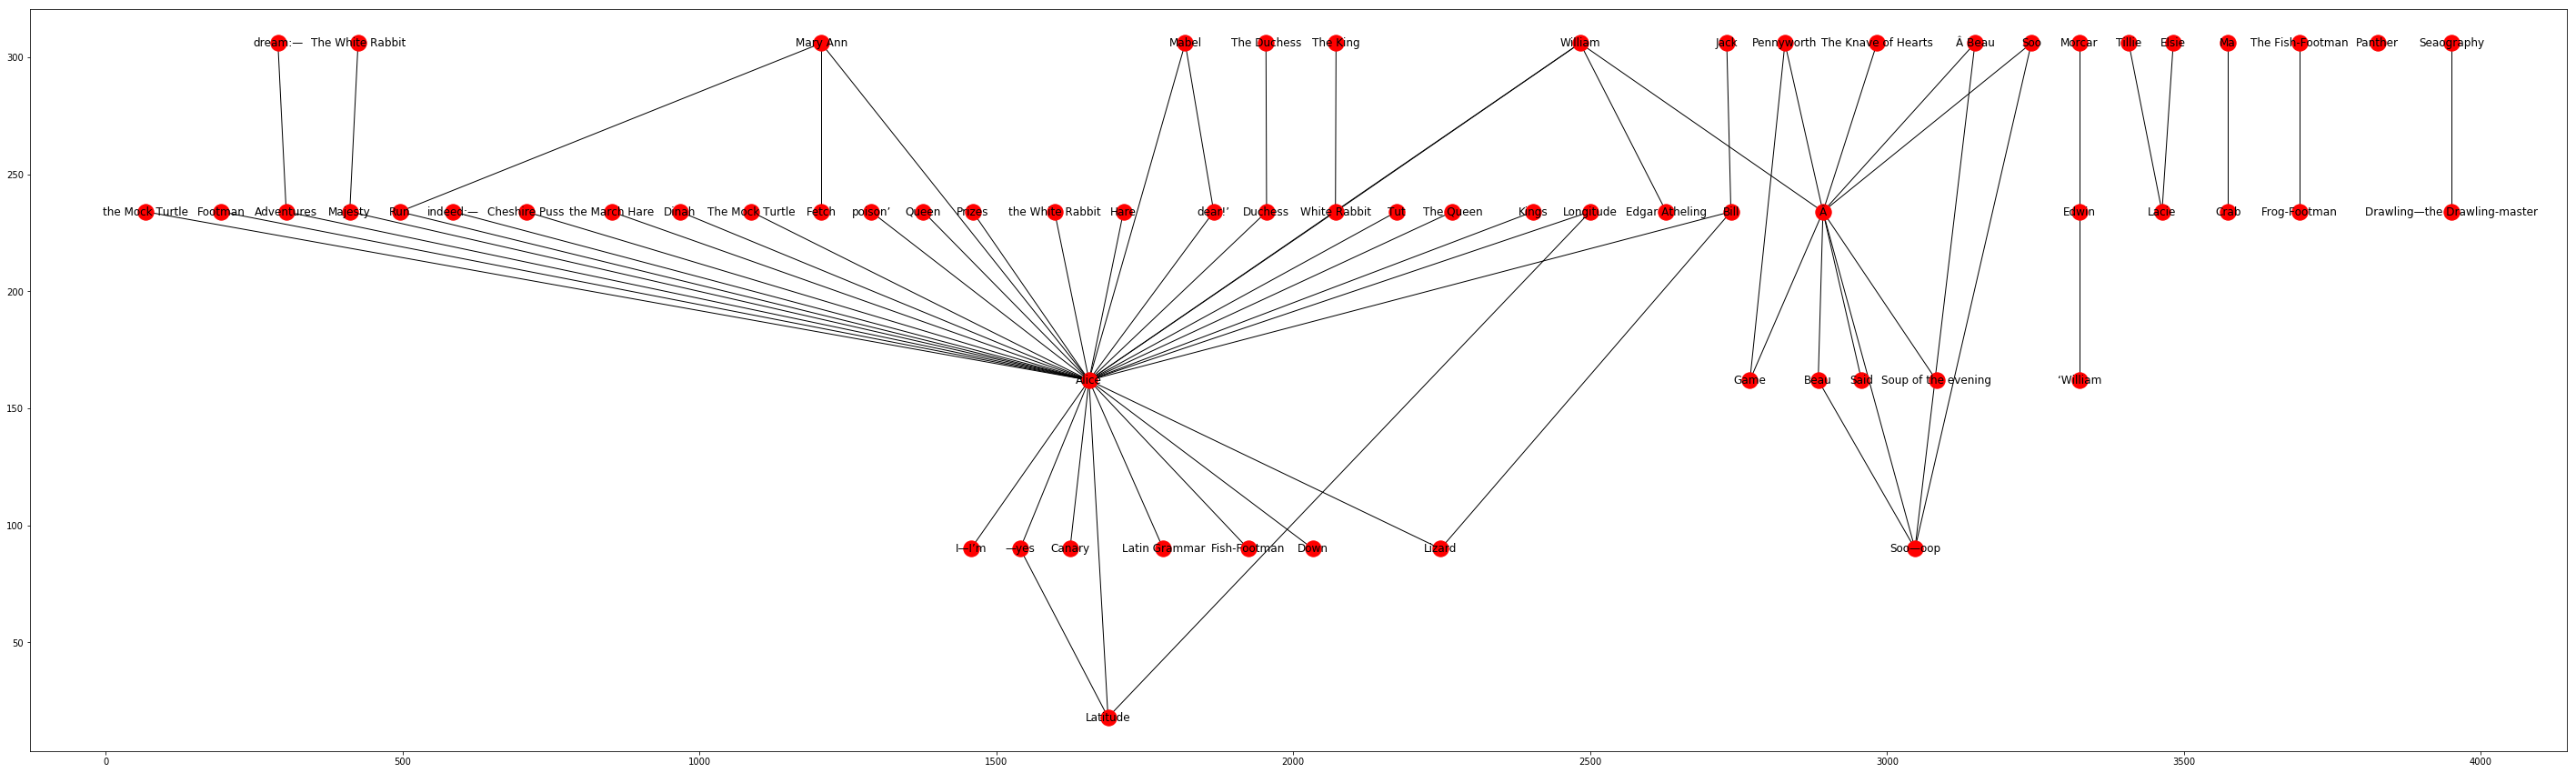

In [24]:
# create an empty graph
G = networkx.Graph()

# iterate over each paragraph's characters
for paragraph in characters:
  
  # iterate over the pairs of characters in this paragraph
  for a, b in ngrams(paragraph, 2):

    # add an edge between these two characters to the graph
    G.add_edge(a, b)
  
# set the size of the chart in width, height
plt.figure(figsize=(50, 15))

# use the dot layout for the plot
positions = networkx.drawing.nx_agraph.graphviz_layout(G, prog='dot')

# draw the chart
networkx.draw_networkx(G, positions)

There we have it! That's all it takes to create networks from text documents!

<h2 style='color:green'>Reviewing Named Entities</h2>

In the segment above, we used the `spacy` package to extract named entities from raw text. See if you can expand on that discussion to print the entities with entity type `WORK_OF_ART` in the following passage:

In [ ]:
s = '''
Emerson wrote most of his important essays as lectures first and then revised them for print. 
His first two collections of essays, Essays: First Series (1841) and Essays: Second Series (1844), 
represent the core of his thinking. They include the well-known essays "Self-Reliance", "The Over-Soul", 
"Circles", "The Poet", and "Experience." Together with "Nature", these essays made the decade from the 
mid-1830s to the mid-1840s Emerson's most fertile period.
'''

# type your code here

<details>
  <summary>Solution</summary>
  We can print these entities with the following code:
  
  ```
  # identify all entities in this string
  doc = nlp(s)

  # loop over all entities in this string
  for i in doc.ents:
    
    # only proceed if the entity type is WORK_OF_ART
    if i.label_ == 'WORK_OF_ART':
      
      # print the entity text
      print(i.text)
  ```
  
</details>

# Computing Simple Graph Statistics

We've now spent time building and visualizing networks with the `networkx` package. Before concluding, we should note that one can also compute many valuable graph attributes and statistics with `networkx`. Let's take a look at a few of these attributes and statistics below.

### Connected Components

Many graph structures contain discrete **connected components**, or subgraphs that have no connections to other subgraphs in the network. Consider, for example, the following graph:

<img src='./images/connected-components.png'>

We can see that this graph has three distinct connected components: 

```
{7, 8}
{4, 5, 6}
{0, 1, 2, 3}
```

To identify the set of connected components in a `networkx` graph, we can use the following method:

In [25]:
list(networkx.connected_components(G))

[{'Adventures',
  'Alice',
  'Beau',
  'Bill',
  'Canary',
  'Cheshire Puss',
  'Dinah',
  'Down',
  'Duchess',
  'Edgar Atheling',
  'Fetch',
  'Fish-Footman',
  'Footman',
  'Game',
  'Hare',
  'I—I’m',
  'Jack',
  'Kings',
  'Latin Grammar',
  'Latitude',
  'Lizard',
  'Longitude',
  'Mabel',
  'Majesty',
  'Mary Ann',
  'Pennyworth',
  'Prizes',
  'Queen',
  'Run',
  'Said',
  'Soo',
  'Soo—oop',
  'Soup of the evening',
  'The Duchess',
  'The King',
  'The Knave of Hearts',
  'The Mock Turtle',
  'The Queen',
  'The White Rabbit',
  'Tut',
  'White Rabbit',
  'William',
  'dear!’',
  'dream:—',
  'indeed:—',
  'poison’',
  'the March Hare',
  'the Mock Turtle',
  'the White Rabbit',
  'Â',
  'Â\xa0Beau',
  '—yes'},
 {'Edwin', 'Morcar', '‘William'},
 {'Elsie', 'Lacie', 'Tillie'},
 {'Crab', 'Ma'},
 {'Frog-Footman', 'The Fish-Footman'},
 {'Panther'},
 {'Drawling—the Drawling-master', 'Seaography'}]

Here `G` is a `networkx.Graph` object, just as we've seen above.

### Node Degree

The **degree** of a node is a count of the number of edges on a node. Because nodes with more edges are more connected within a graph, the degree of a node can be used as a measure of the node's significance within a network. To get the degree of each node in a network, we can use the following method:

In [26]:
dict(networkx.degree(G))

{'Adventures': 2,
 'Alice': 36,
 'Beau': 2,
 'Bill': 5,
 'Canary': 1,
 'Cheshire Puss': 1,
 'Crab': 1,
 'Dinah': 1,
 'Down': 1,
 'Drawling—the Drawling-master': 1,
 'Duchess': 2,
 'Edgar Atheling': 1,
 'Edwin': 2,
 'Elsie': 1,
 'Fetch': 1,
 'Fish-Footman': 1,
 'Footman': 1,
 'Frog-Footman': 1,
 'Game': 2,
 'Hare': 1,
 'I—I’m': 1,
 'Jack': 1,
 'Kings': 1,
 'Lacie': 2,
 'Latin Grammar': 1,
 'Latitude': 3,
 'Lizard': 2,
 'Longitude': 2,
 'Ma': 1,
 'Mabel': 4,
 'Majesty': 2,
 'Mary Ann': 5,
 'Morcar': 1,
 'Panther': 2,
 'Pennyworth': 2,
 'Prizes': 3,
 'Queen': 1,
 'Run': 2,
 'Said': 1,
 'Seaography': 1,
 'Soo': 2,
 'Soo—oop': 4,
 'Soup of the evening': 3,
 'The Duchess': 1,
 'The Fish-Footman': 1,
 'The King': 1,
 'The Knave of Hearts': 1,
 'The Mock Turtle': 1,
 'The Queen': 1,
 'The White Rabbit': 1,
 'Tillie': 1,
 'Tut': 1,
 'White Rabbit': 3,
 'William': 6,
 'dear!’': 2,
 'dream:—': 1,
 'indeed:—': 1,
 'poison’': 1,
 'the March Hare': 1,
 'the Mock Turtle': 1,
 'the White Rabbit': 1,
 

Within the dictionary this method returns, each key represents the name of a node in the graph, and each value represents the number of edges the given node possesses.

### Betweenness Centrality

The **betweenness centrality** score of a node is a measure of how central a node is to the inter-relationships within its graph. 

When considering betweenness centrality, we can think of our graph as a series of cities (nodes) connected by roads (edges). If drivers from most cities must pass through one particular city in order to travel around, that frequently-visited city would have a high betweenness centrality score. 

Consider for example the graph below:

<img src='./images/betweenness-centrality.png'>

We can see that white nodes on the left and right side of the graph must pass through the blue node. This means that the blue node would have a high betweenness centrality score in this graph. 

To compute the betweenness centrality score for each node in a graph, we can use the following method:

In [27]:
dict(networkx.betweenness_centrality(G))

{'Adventures': 0.0248015873015873,
 'Alice': 0.5811011904761905,
 'Beau': 0.0,
 'Bill': 0.0248015873015873,
 'Canary': 0.0,
 'Cheshire Puss': 0.0,
 'Crab': 0.0,
 'Dinah': 0.0,
 'Down': 0.0,
 'Drawling—the Drawling-master': 0.0,
 'Duchess': 0.0248015873015873,
 'Edgar Atheling': 0.0,
 'Edwin': 0.000496031746031746,
 'Elsie': 0.0,
 'Fetch': 0.0,
 'Fish-Footman': 0.0,
 'Footman': 0.0,
 'Frog-Footman': 0.0,
 'Game': 0.0,
 'Hare': 0.0,
 'I—I’m': 0.0,
 'Jack': 0.0,
 'Kings': 0.0,
 'Lacie': 0.000496031746031746,
 'Latin Grammar': 0.0,
 'Latitude': 0.000248015873015873,
 'Lizard': 0.0,
 'Longitude': 0.0,
 'Ma': 0.0,
 'Mabel': 0.0,
 'Majesty': 0.0248015873015873,
 'Mary Ann': 0.0248015873015873,
 'Morcar': 0.0,
 'Panther': 0.0,
 'Pennyworth': 0.0,
 'Prizes': 0.0,
 'Queen': 0.0,
 'Run': 0.0,
 'Said': 0.0,
 'Seaography': 0.0,
 'Soo': 0.0,
 'Soo—oop': 0.000744047619047619,
 'Soup of the evening': 0.0,
 'The Duchess': 0.0,
 'The Fish-Footman': 0.0,
 'The King': 0.0,
 'The Knave of Hearts': 0.0,
 'T

Just like the `degree` measure above, the betweenness centrality score returns a dictionary where each key represents a node name and each value represents the betweenness centrality of the given node. Also like the `degree` measure, we can use the `betweeness_centrality` measure as a measure of the significance of a node within a network.

# Going Further with Graphs

Congratulations--you've made it through our introduction to network analysis with Python! If you are interested in going further with network analysis, there are a number of possible next steps you can take. 

#### Investigate Different Graph Types

In the analysis above, we have focused only on the simplest kind of graphs. But there are many different kinds of graphs, including: weighted and unweighted graphs, cyclic and acyclic graphs, directed and undirected graphs, and so forth. To become proficient with graphs, you may wish to explore some of these other graph types.

#### Explore Alternative Graph Representations

We've been using matplotlib for rendering our graphs, but matplotlib can only carry you so far. At some point you may wish to create interactive graphs, or more styled graphs like we saw in the [Royal Constellations](http://www.datasketch.es/october/code/nadieh/) example. If you are interested in rendering graphs, feel free to explore the [D3.js library](https://d3js.org/), an excellent resource for dynamic and highly stylized plotting of all varieties.

#### Explore Additional Graph Data Sources

Most of the graphs we've examined above were based on a single text. The method we used for creating graphs above--based primarily on the juxtaposition of speakers in a text--is of course only one way to construct graphs. You may also wish to explore alternative approaches to generating networks, including the use of [ready-made geneological data](https://webtreeprint.com/tp_famous_gedcoms.php) or more tabular data inputs.